## Project
### 1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

# Online Retail Data Set 

Dataset from UCI - Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [54]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [55]:
# read excel
df = pd.read_excel("Online-Retail.xls")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

In [56]:
# Show me the unique country varibales
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain'], dtype=object)

In [57]:
# add a new column for date 
# convert date column to date time + add new column
df['Date'] = pd.to_datetime(df['InvoiceDate'])

# create a new column for month
df['Month'] = df['Date'].dt.strftime('%b %Y')

#investigating the time series of the data
df['Month'].unique()

array(['Dec 2010', 'Jan 2011'], dtype=object)

In [58]:
# What is the Total Cost 
df['Total Cost'] =  df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Total Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,Dec 2010,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,Dec 2010,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,Dec 2010,54.08


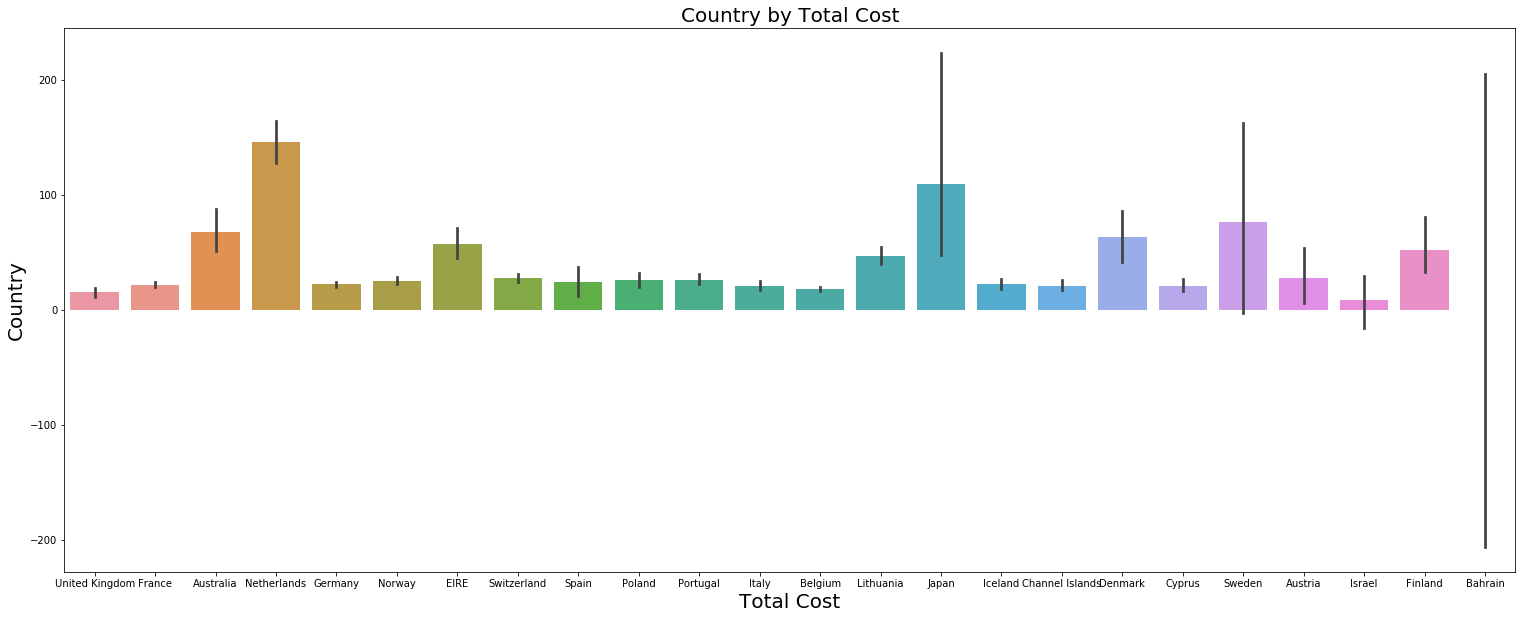

In [68]:
%matplotlib inline


plt.figure(figsize=(26, 10))
plot = sns.barplot(df['Country'], df['Total Cost'])

plot.set_title('Country by Total Cost',fontsize=20)
plot.set_ylabel('Country',fontsize=20)
plot.set_xlabel('Total Cost',fontsize=20)

plot

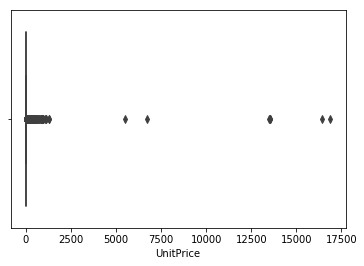

In [60]:
x = df['UnitPrice']
sns.boxplot(x)
